In [1]:
import pandas as pd
import numpy as np

import random
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import keras
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/ML Project/Project Report/"

In [6]:
comments_df = pd.DataFrame(columns=['ID', 'cleaned_comments'])
movies_df = pd.read_csv(path+"Datasets/movie_success_rate.csv").dropna()
id_df = pd.read_csv(path+"Datasets/modified_movie_id.csv").dropna()

In [7]:
for i in range(1,17):
  com_df = pd.read_csv(path+"Datasets/movie_comments/movieCommentsCleaned/movieCommentsCleaned"+str(i)+".csv")
  com_df = com_df[['ID', 'cleaned_comments']].copy()
  comments_df =pd.concat([comments_df, com_df])

In [8]:
comments_df =  comments_df.dropna()
comments_df

,ID,cleaned_comments
0,KIpGKumxiGg,night better fuck
1,KIpGKumxiGg,window thing made laugh ha ha ha
2,KIpGKumxiGg,anyon els think kevin michael fassbend
3,KIpGKumxiGg,board start quot alter bodi chemistri mind quot
4,KIpGKumxiGg,god professor happen
...,...,...
7371,CZIt20emgLY,shmoe
7372,CZIt20emgLY,look cool differ
7373,CZIt20emgLY,father son kinda weird
7374,CZIt20emgLY,actual interest one good might abl forgiv airb...


In [9]:
from pandas.io.formats.style_render import DataFrame
comments_df = comments_df.groupby('ID',sort=False)['cleaned_comments'].apply(lambda x: ' '.join(x)).reset_index()

In [10]:
movies_df = movies_df[['Title', 'Rating']].copy().dropna()

In [11]:
l1 = []
for i in range(len(movies_df)):
  if(movies_df.iloc[i]['Rating'] > 7.0):
    l1.append('Good')
  elif(movies_df.iloc[i]['Rating'] > 5.0):
    l1.append('Average')
  elif(movies_df.iloc[i]['Rating'] > 0):
    l1.append('Bad')

movies_df['rating_category'] = l1

In [13]:
movies_df.head()

,Title,Rating,rating_category
0,Guardians of the Galaxy,8.1,Good
1,Prometheus,7.0,Average
2,Split,7.3,Good
3,Sing,7.2,Good
4,Suicide Squad,6.2,Average


In [14]:
movies_df = movies_df[['Title', 'rating_category']].copy().dropna()

In [15]:
movies_df['rating_category'].value_counts()

Average    459
Good       356
Bad         23
Name: rating_category, dtype: int64

In [16]:
result = pd.merge(id_df, movies_df, on=["Title"])
final_result = pd.merge(result, comments_df, on=["ID"])

In [17]:
final_result

,Unnamed: 0,Title,ID,rating_category,cleaned_comments
0,0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...
1,1,Prometheus,HHcHYisZFLU,Average,thing front space jockey mayb webstermuhammad ...
2,2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...
3,4,Suicide Squad,CmRih_VtVAs,Average,salv modinha dc comic v good jiiiizzzzzzzzeddd...
4,5,The Great Wall,avF6GHyyk5c,Average,oliv queen came save day shado pan need kind m...
...,...,...,...,...,...
720,833,Resident Evil: Afterlife,SRRN6MvCdeg,Average,either jill valentin clair yyyyyyyyyyyyyyyyyyy...
721,834,Project X,p8_U0n2oIHA,Average,took back highschool th grade dawg gosh nostal...
722,835,Hostel: Part II,7oG7ktw806Y,Average,happen guy surviv got reveng captor part saw m...
723,836,Step Up 2: The Streets,bL2wDI-O5YQ,Average,oooooooooo girl soooo sexyyyyyyi holi crap j w...


In [18]:
final_result = final_result[['Title','ID','rating_category','cleaned_comments']]

In [19]:
final_result

,Title,ID,rating_category,cleaned_comments
0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...
1,Prometheus,HHcHYisZFLU,Average,thing front space jockey mayb webstermuhammad ...
2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...
3,Suicide Squad,CmRih_VtVAs,Average,salv modinha dc comic v good jiiiizzzzzzzzeddd...
4,The Great Wall,avF6GHyyk5c,Average,oliv queen came save day shado pan need kind m...
...,...,...,...,...
720,Resident Evil: Afterlife,SRRN6MvCdeg,Average,either jill valentin clair yyyyyyyyyyyyyyyyyyy...
721,Project X,p8_U0n2oIHA,Average,took back highschool th grade dawg gosh nostal...
722,Hostel: Part II,7oG7ktw806Y,Average,happen guy surviv got reveng captor part saw m...
723,Step Up 2: The Streets,bL2wDI-O5YQ,Average,oooooooooo girl soooo sexyyyyyyi holi crap j w...


In [20]:
movie_list = final_result['Title'].unique()
movie_list = list(movie_list)

print(movie_list)
print(len(movie_list))
number_of_movies = len(movie_list)
train_number = int(number_of_movies * 0.7)
test_number = number_of_movies - train_number

print("Train number:",train_number)
print("Test number:",test_number)

['Guardians of the Galaxy', 'Prometheus', 'Split', 'Suicide Squad', 'The Great Wall', 'La La Land', 'The Lost City of Z', 'Passengers', 'Hidden Figures', 'Rogue One', 'Colossal', 'Jason Bourne', 'Lion', 'Manchester by the Sea', 'Independence Day: Resurgence', 'Bad Moms', "Assassin's Creed", 'Why Him?', 'Nocturnal Animals', 'X-Men: Apocalypse', 'Resident Evil: The Final Chapter', 'Captain America: Civil War', 'Interstellar', 'Doctor Strange', 'The Magnificent Seven', 'Sausage Party', 'Moonlight', 'The Founder', 'Lowriders', 'Pirates of the Caribbean: On Stranger Tides', 'Miss Sloane', 'Underworld: Blood Wars', "Mother's Day", 'John Wick', 'The Dark Knight', 'Silence', "Don't Breathe", 'Me Before You', 'Their Finest', 'Sully', 'Batman v Superman: Dawn of Justice', 'Fifty Shades of Grey', 'The Prestige', 'Kingsman: The Secret Service', 'Patriots Day', 'Mad Max: Fury Road', 'Wakefield', 'Deepwater Horizon', 'A Monster Calls', 'Collateral Beauty', 'Inglourious Basterds', "Pirates of the Car

In [21]:
train_movie_list = random.sample(movie_list, train_number)
test_movie_list = list(set(movie_list).difference(train_movie_list))

In [22]:
print(len(train_movie_list))
print(len(test_movie_list))

507
218


## **Count Vectorizer Max features (4000) Unigram - Three classes (good,bad,average)**

### **Data Preprocessing**

In [23]:
cv = CountVectorizer(max_features=4000)

In [ ]:
# X = cv.fit_transform(final_result['cleaned_comments']).toarray()

In [24]:
# tf = TfidfVectorizer(max_features=4000)
X = cv.fit_transform(final_result['cleaned_comments']).toarray()
# y = data['sentiment']

In [ ]:
# X = tf.fit_transform(final_result['cleaned_comments']).toarray()


In [25]:

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(final_result['rating_category'])
encoded_Y = encoder.transform(final_result['rating_category'])


In [28]:
encoded_Y

array([2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,

In [29]:
labels = np_utils.to_categorical(encoded_Y)
labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [30]:
final_result['bow_comments'] = list(X)

final_result.head()

,Title,ID,rating_category,cleaned_comments,bow_comments
0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,Prometheus,HHcHYisZFLU,Average,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ..."
2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Suicide Squad,CmRih_VtVAs,Average,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The Great Wall,avF6GHyyk5c,Average,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [31]:
final_result['labels'] = list(labels)

In [32]:
final_result.head()

,Title,ID,rating_category,cleaned_comments,bow_comments,labels
0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
1,Prometheus,HHcHYisZFLU,Average,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"
2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
3,Suicide Squad,CmRih_VtVAs,Average,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"
4,The Great Wall,avF6GHyyk5c,Average,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"


In [33]:
train_set = final_result[final_result['Title'].isin(train_movie_list)]
test_set = final_result[final_result['Title'].isin(test_movie_list)]

In [35]:
train_set.head()

,Title,ID,rating_category,cleaned_comments,bow_comments,labels
0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
1,Prometheus,HHcHYisZFLU,Average,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"
6,The Lost City of Z,yqGDNvX1F4g,Good,lost citi full movi watch hd hermosa elecci ny...,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
9,Rogue One,frdj1zb9sMY,Good,got chill watch look amaz yessssss lit dude la...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
11,Jason Bourne,F4gJsKZvqE4,Average,still beliv mani question even rememb girl eve...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"


In [36]:
test_set.head()

,Title,ID,rating_category,cleaned_comments,bow_comments,labels
2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
3,Suicide Squad,CmRih_VtVAs,Average,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"
4,The Great Wall,avF6GHyyk5c,Average,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"
5,La La Land,0pdqf4P9MB8,Good,sound fun sorri guy watch trailer want experi ...,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0]"
7,Passengers,7BWWWQzTpNU,Average,jennif lawrenc tabl realli tri get us cinema w...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0]"


### **Neural Networks** 

In [ ]:

model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train = []
for i in train_set['bow_comments']:
  X_train.append(i)

In [ ]:
X_train = np.array(X_train).astype('float32')

In [ ]:
print(len(X_train))

507


In [ ]:
y_train = []
for i in train_set['labels']:
  y_train.append(i)


In [ ]:
y_train = np.array(y_train).astype('float32')

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
51/51 [==============================] - 1s 4ms/step - loss: 0.5786 - accuracy: 0.5542
Epoch 2/5
51/51 [==============================] - 0s 4ms/step - loss: 0.1783 - accuracy: 0.9191
Epoch 3/5
51/51 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 4/5
51/51 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9980
Epoch 5/5
51/51 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9980


In [ ]:
y_test = []
for i in test_set['labels']:
  y_test.append(i)

In [ ]:
X_test = []
for i in test_set['bow_comments']:
  X_test.append(i)

In [ ]:
X_test = np.array(X_test).astype('float32')

In [ ]:
y_test = np.array(y_test).astype('float32')

In [ ]:
nn_score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', nn_score[1])

nn_score = nn_score[1]

Test accuracy: 0.6788991093635559


### **Naive Bayes**

In [ ]:
from sklearn.metrics import accuracy_score
y_train_lr = np.argmax(y_train,axis=1)
y_test_lr = np.argmax(y_test,axis=1)

In [ ]:
nb_model = MultinomialNB().fit(X_train, y_train_lr)

In [ ]:
nb_pred = nb_model.predict(X_test)

In [ ]:
nb_pred

array([0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0])

In [ ]:
nb_score = accuracy_score(y_test_lr, nb_pred)
nb_score

0.6605504587155964

### **K-NN CLassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



KNeighborsClassifier()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_lr)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_pred

array([2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0])

In [ ]:
knn_score = accuracy_score(y_test_lr, knn_pred)
knn_score

0.5275229357798165

### **Logistic Regression**


In [ ]:
lr = LogisticRegression(multi_class="ovr",solver="lbfgs", max_iter=3000)

In [ ]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_train_lr = np.argmax(y_train,axis=1)

In [ ]:
y_train_lr

array([2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,

In [ ]:
y_train_lr.shape

(507,)

In [ ]:
lr.fit(X_train,y_train_lr)

LogisticRegression(max_iter=3000, multi_class='ovr')

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred

array([2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test_lr = np.argmax(y_test,axis=1)

In [ ]:
y_test_lr

array([2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0])

In [ ]:
lr_score = accuracy_score(y_test_lr, lr_pred)
lr_score

0.6880733944954128

### **Bagging and Boosting**

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base classifier
base_classifier = DecisionTreeClassifier(max_depth=3)

# Initialize the bagging classifier with the base classifier
bagging = BaggingClassifier(estimator=base_classifier, n_estimators=100)

# Fit the model using bagging
bagging.fit(X_train, y_train_lr)

# Predict using the trained model
y_pred = bagging.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0])

In [ ]:
bag_score = accuracy_score(y_test_lr, y_pred)
bag_score

0.6880733944954128

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42
)

# xgb_model.fit(X_train, y_train)

In [ ]:
xgb_model.fit(X_train, y_train_lr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
boost_score = accuracy_score(y_test_lr, y_pred)
boost_score

0.7247706422018348

### **Model Comparison**

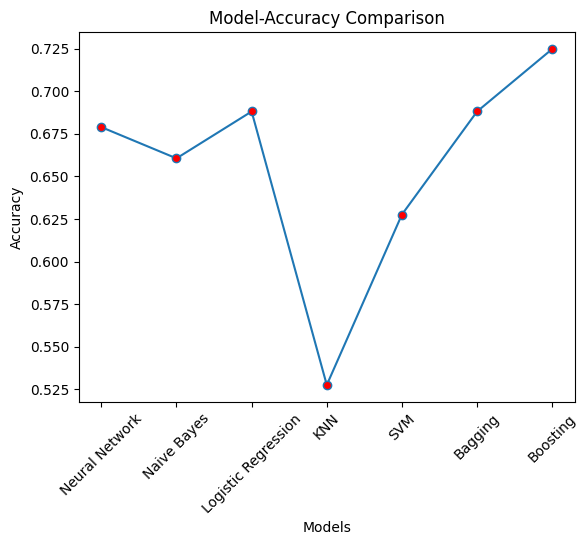

In [ ]:
import matplotlib.pyplot as plt

y = [nn_score, nb_score, lr_score, knn_score, svm_score, bag_score, boost_score]
x = ["Neural Network","Naive Bayes","Logistic Regression","KNN","SVM","Bagging","Boosting"]
# plt.xticks(x,rotate=45)
plt.plot(y, marker='o', markerfacecolor="red")
plt.xticks([0,1,2,3,4,5,6],x, rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model-Accuracy Comparison")
plt.savefig("model-accuracy-comparison_3class.pdf", bbox_inches = 'tight')


## **Count Vectorizer max_features:4000 - Two classes (good,bad)**

### **Data Preprocessing**

In [37]:
comments_df

,ID,cleaned_comments
0,KIpGKumxiGg,night better fuck window thing made laugh ha h...
1,d96cjJhvlMA,holi shit mark see collector end credit scene ...
2,yqGDNvX1F4g,lost citi full movi watch hd hermosa elecci ny...
3,avF6GHyyk5c,oliv queen came save day shado pan need kind m...
4,0pdqf4P9MB8,sound fun sorri guy watch trailer want experi ...
...,...,...
720,CldGTG6iVrU,worst trailer ever preguuuuuuuuuuuuntameeeeeee...
721,nasLuiP-1E0,shit hollywood idea theyr alway reviv old movi...
722,spf7RULGNOU,great movi fantast soundtrack movi see paul mc...
723,_jHA97HzhxE,cring look terribl movi potenti anim cat happe...


In [39]:
movies_df = pd.read_csv(path+"Datasets/movie_success_rate.csv").dropna()
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def classify_movie_ratings(x):
  if x > 6.8:
    return "Good"
  else:
    return "Bad"

In [41]:
movies_df_final = movies_df[["Title","Rating"]]
movies_df_final.head()

,Title,Rating
0,Guardians of the Galaxy,8.1
1,Prometheus,7.0
2,Split,7.3
3,Sing,7.2
4,Suicide Squad,6.2


In [42]:
movies_df_final["Rating"] = movies_df_final["Rating"].apply(classify_movie_ratings)

<ipython-input-42-7e031a623311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_final["Rating"] = movies_df_final["Rating"].apply(classify_movie_ratings)


In [43]:
movies_df_final['Rating'].value_counts()

Good    422
Bad     416
Name: Rating, dtype: int64

In [44]:
result = pd.merge(id_df, movies_df_final, on=["Title"])
final_result = pd.merge(result, comments_df, on=["ID"])

In [45]:
final_result.head()


,Unnamed: 0,Title,ID,Rating,cleaned_comments
0,0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...
1,1,Prometheus,HHcHYisZFLU,Good,thing front space jockey mayb webstermuhammad ...
2,2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...
3,4,Suicide Squad,CmRih_VtVAs,Bad,salv modinha dc comic v good jiiiizzzzzzzzeddd...
4,5,The Great Wall,avF6GHyyk5c,Bad,oliv queen came save day shado pan need kind m...


In [46]:
movie_list = final_result['Title'].unique()
movie_list = list(movie_list)

print(movie_list)
print(len(movie_list))
number_of_movies = len(movie_list)
train_number = int(number_of_movies * 0.8)
test_number = number_of_movies - train_number

print("Train number:",train_number)
print("Test number:",test_number)

['Guardians of the Galaxy', 'Prometheus', 'Split', 'Suicide Squad', 'The Great Wall', 'La La Land', 'The Lost City of Z', 'Passengers', 'Hidden Figures', 'Rogue One', 'Colossal', 'Jason Bourne', 'Lion', 'Manchester by the Sea', 'Independence Day: Resurgence', 'Bad Moms', "Assassin's Creed", 'Why Him?', 'Nocturnal Animals', 'X-Men: Apocalypse', 'Resident Evil: The Final Chapter', 'Captain America: Civil War', 'Interstellar', 'Doctor Strange', 'The Magnificent Seven', 'Sausage Party', 'Moonlight', 'The Founder', 'Lowriders', 'Pirates of the Caribbean: On Stranger Tides', 'Miss Sloane', 'Underworld: Blood Wars', "Mother's Day", 'John Wick', 'The Dark Knight', 'Silence', "Don't Breathe", 'Me Before You', 'Their Finest', 'Sully', 'Batman v Superman: Dawn of Justice', 'Fifty Shades of Grey', 'The Prestige', 'Kingsman: The Secret Service', 'Patriots Day', 'Mad Max: Fury Road', 'Wakefield', 'Deepwater Horizon', 'A Monster Calls', 'Collateral Beauty', 'Inglourious Basterds', "Pirates of the Car

In [47]:
train_movie_list = random.sample(movie_list, train_number)
test_movie_list = list(set(movie_list).difference(train_movie_list))

In [48]:
cv = CountVectorizer(max_features=4000)

In [49]:
X = cv.fit_transform(final_result['cleaned_comments']).toarray()

In [50]:
encoder = LabelEncoder()
encoder.fit(final_result["Rating"])
encoded_Y = encoder.transform(final_result['Rating'])

In [51]:
encoded_Y

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [52]:
labels = np_utils.to_categorical(encoded_Y)
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [53]:
final_result['bow_comments'] = list(X)

final_result.head()

,Unnamed: 0,Title,ID,Rating,cleaned_comments,bow_comments
0,0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,1,Prometheus,HHcHYisZFLU,Good,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ..."
2,2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Suicide Squad,CmRih_VtVAs,Bad,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,The Great Wall,avF6GHyyk5c,Bad,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [54]:
final_result['labels'] = list(labels)

In [55]:
final_result.head()

,Unnamed: 0,Title,ID,Rating,cleaned_comments,bow_comments,labels
0,0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.0, 1.0]"
1,1,Prometheus,HHcHYisZFLU,Good,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[0.0, 1.0]"
2,2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0]"
3,4,Suicide Squad,CmRih_VtVAs,Bad,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"
4,5,The Great Wall,avF6GHyyk5c,Bad,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"


In [56]:
train_set = final_result[final_result['Title'].isin(train_movie_list)]
test_set = final_result[final_result['Title'].isin(test_movie_list)]

In [57]:
train_set.head()

,Unnamed: 0,Title,ID,Rating,cleaned_comments,bow_comments,labels
0,0,Guardians of the Galaxy,d96cjJhvlMA,Good,holi shit mark see collector end credit scene ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.0, 1.0]"
1,1,Prometheus,HHcHYisZFLU,Good,thing front space jockey mayb webstermuhammad ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[0.0, 1.0]"
2,2,Split,KIpGKumxiGg,Good,night better fuck window thing made laugh ha h...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0]"
3,4,Suicide Squad,CmRih_VtVAs,Bad,salv modinha dc comic v good jiiiizzzzzzzzeddd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"
4,5,The Great Wall,avF6GHyyk5c,Bad,oliv queen came save day shado pan need kind m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"


In [58]:
test_set.head()

,Unnamed: 0,Title,ID,Rating,cleaned_comments,bow_comments,labels
20,29,Resident Evil: The Final Chapter,79Sd4GtOXuI,Bad,know go good total failur watch see lee jun ki...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"
21,30,Captain America: Civil War,dKrVegVI0Us,Good,best trailer ever crap pant spider man omg omg...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0]"
28,37,Lowriders,6k0mm_cxzy0,Bad,car nothin lo lo quot la mission quot better m...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0]"
31,42,Underworld: Blood Wars,rKHL5PyAPzs,Bad,wait year happi cant wait quot need deliv mess...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1.0, 0.0]"
39,50,Sully,mjKEXxO2KNE,Good,right wb great trailer tom hank collabor good ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0]"


### **Naive Bayes** 

In [ ]:
from sklearn.metrics import accuracy_score
y_train_lr = np.argmax(y_train,axis=1)
y_test_lr = np.argmax(y_test,axis=1)

In [ ]:
nb_model = MultinomialNB().fit(X_train, y_train_lr)

In [ ]:
nb_pred = nb_model.predict(X_test)

In [ ]:
nb_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
nb_score = accuracy_score(y_test_lr, nb_pred)
nb_score

0.696551724137931

### **Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=3000)

In [ ]:
lr.fit(X_train,y_train_lr)

LogisticRegression(max_iter=3000)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
lr_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
lr_score = accuracy_score(y_test_lr, lr_pred)
lr_score

0.6551724137931034

### **K-NN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_lr)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test data
k_pred = knn.predict(X_test)

In [ ]:
knn_score = accuracy_score(y_test_lr, k_pred)
knn_score

0.5310344827586206

### **SVM - Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train_lr)

SVC(kernel='linear')

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
svm_score = accuracy_score(y_test_lr, svm_pred)
svm_score

0.6275862068965518

### **Neural Network** 

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train = []
for i in train_set['bow_comments']:
  X_train.append(i)

y_train = []
for i in train_set['labels']:
  y_train.append(i)

In [ ]:
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
58/58 [==============================] - 6s 3ms/step - loss: 0.7162 - accuracy: 0.6310
Epoch 2/5
58/58 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9603
Epoch 3/5
58/58 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9914
Epoch 4/5
58/58 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 5/5
58/58 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000


In [ ]:
X_test = []
for i in test_set['bow_comments']:
  X_test.append(i)

y_test = []
for i in test_set['labels']:
  y_test.append(i)

In [ ]:
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [ ]:
nl_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', nl_score[0])
print('Test accuracy:', nl_score[1])

Test loss: 1.3761478662490845
Test accuracy: 0.7310344576835632


### **Bagging and Boosting**

In [ ]:
from sklearn.metrics import accuracy_score
y_train_lr = np.argmax(y_train,axis=1)
y_test_lr = np.argmax(y_test,axis=1)

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base classifier
base_classifier = DecisionTreeClassifier(max_depth=3)

# Initialize the bagging classifier with the base classifier
bagging = BaggingClassifier(estimator=base_classifier, n_estimators=100)

# Fit the model using bagging
bagging.fit(X_train, y_train_lr)

# Predict using the trained model
y_pred = bagging.predict(X_test)

In [ ]:
bag_score = accuracy_score(y_test_lr,y_pred)
bag_score

0.6827586206896552

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
train_features = xgb_model.predict(X_train)
test_features = xgb_model.predict(X_test)

In [ ]:
boost_score = accuracy_score(y_test, test_features)
boost_score

0.6758620689655173

### **Model Comparison**

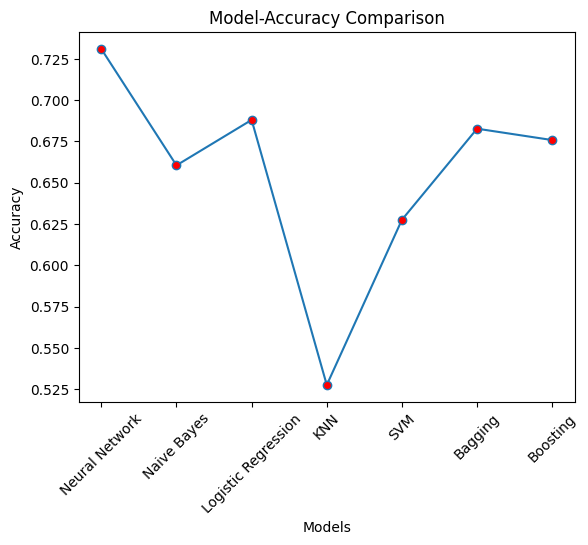

In [ ]:
import matplotlib.pyplot as plt

y = [nl_score[1], nb_score, lr_score, knn_score, svm_score, bag_score, boost_score]
x = ["Neural Network","Naive Bayes","Logistic Regression","KNN","SVM","Bagging","Boosting"]
# plt.xticks(x,rotate=45)
plt.plot(y, marker='o', markerfacecolor="red")
plt.xticks([0,1,2,3,4,5,6],x, rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model-Accuracy Comparison")
plt.savefig("model-accuracy-comparison.pdf", bbox_inches = 'tight')


## **TF-IDF Max Features: 4000 (Three classes)**

### **Data Preprocessing**

In [60]:
movies_df = pd.read_csv(path+"Datasets/movie_success_rate.csv").dropna()
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:

merged_comments_df = comments_df.groupby('ID',sort=False)['cleaned_comments'].apply(lambda x: ' '.join(x)).reset_index()
merged_comments_df.head()

,ID,cleaned_comments
0,KIpGKumxiGg,night better fuck window thing made laugh ha h...
1,d96cjJhvlMA,holi shit mark see collector end credit scene ...
2,yqGDNvX1F4g,lost citi full movi watch hd hermosa elecci ny...
3,avF6GHyyk5c,oliv queen came save day shado pan need kind m...
4,0pdqf4P9MB8,sound fun sorri guy watch trailer want experi ...


In [62]:
final_df = pd.merge(merged_comments_df,id_df, on=['ID'],sort=False)

In [63]:
final_df = pd.merge(final_df,movies_df, on=['Title'],sort=False)

In [64]:
final_df = final_df[['Title', 'cleaned_comments', 'Rating']]

In [65]:
final_df.head()

,Title,cleaned_comments,Rating
0,Split,night better fuck window thing made laugh ha h...,7.3
1,Guardians of the Galaxy,holi shit mark see collector end credit scene ...,8.1
2,The Lost City of Z,lost citi full movi watch hd hermosa elecci ny...,7.1
3,The Great Wall,oliv queen came save day shado pan need kind m...,6.1
4,La La Land,sound fun sorri guy watch trailer want experi ...,8.3


In [66]:
def classify_ratings(x):
  if x>7.0:
    return "Good"
  elif x>5.4:
    return "Average"
  else: 
    return "Bad"
  
final_df["rating_category"] = final_df['Rating'].apply(classify_ratings)

In [67]:
final_df['rating_category'].value_counts()

Average    382
Good       296
Bad         47
Name: rating_category, dtype: int64

In [68]:
movie_list = final_df['Title'].unique()
movie_list = list(movie_list)

print(movie_list)
print(len(movie_list))
number_of_movies = len(movie_list)
train_number = int(number_of_movies * 0.8)
test_number = number_of_movies - train_number

print("Train number:",train_number)
print("Test number:",test_number)

['Split', 'Guardians of the Galaxy', 'The Lost City of Z', 'The Great Wall', 'La La Land', 'Prometheus', 'Passengers', 'Suicide Squad', 'Colossal', 'Hidden Figures', 'Jason Bourne', 'Lion', 'Rogue One', 'Why Him?', 'Bad Moms', 'Manchester by the Sea', 'Nocturnal Animals', 'Resident Evil: The Final Chapter', 'Interstellar', "Assassin's Creed", 'The Magnificent Seven', 'Sausage Party', 'Independence Day: Resurgence', 'The Founder', 'Lowriders', 'Pirates of the Caribbean: On Stranger Tides', 'Moonlight', 'Miss Sloane', 'Doctor Strange', 'X-Men: Apocalypse', 'Captain America: Civil War', 'Underworld: Blood Wars', "Mother's Day", 'Silence', 'Their Finest', 'The Dark Knight', "Don't Breathe", 'Me Before You', 'John Wick', 'The Prestige', 'Patriots Day', 'Kingsman: The Secret Service', 'Wakefield', 'Deepwater Horizon', 'A Monster Calls', 'Sully', 'Collateral Beauty', "Pirates of the Caribbean: Dead Man's Chest", 'Inglourious Basterds', 'Mad Max: Fury Road', 'Inception', 'Fifty Shades of Grey'

In [69]:
train_movie_list = random.sample(movie_list, train_number)
test_movie_list = list(set(movie_list).difference(train_movie_list))

In [70]:
X = final_df['cleaned_comments']
y = final_df['rating_category']

In [71]:
tf = TfidfVectorizer(max_features=4000)
X = tf.fit_transform(X).toarray()
final_df['bow_comments'] = list(X)

In [72]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
labels = np_utils.to_categorical(y)
final_df['label'] = list(labels)

In [73]:
final_df.head()

,Title,cleaned_comments,Rating,rating_category,bow_comments,label
0,Split,night better fuck window thing made laugh ha h...,7.3,Good,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0212109586421...","[0.0, 0.0, 1.0]"
1,Guardians of the Galaxy,holi shit mark see collector end credit scene ...,8.1,Good,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0175098303832...","[0.0, 0.0, 1.0]"
2,The Lost City of Z,lost citi full movi watch hd hermosa elecci ny...,7.1,Good,"[0.0387965096726865, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0]"
3,The Great Wall,oliv queen came save day shado pan need kind m...,6.1,Average,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
4,La La Land,sound fun sorri guy watch trailer want experi ...,8.3,Good,"[0.0, 0.0, 0.0, 0.02983284614333664, 0.0, 0.0,...","[0.0, 0.0, 1.0]"


In [74]:
train_set = final_df[final_df['Title'].isin(train_movie_list)]
test_set = final_df[final_df['Title'].isin(test_movie_list)]

### **Neural Network**

In [ ]:
X_train = []
for i in train_set['bow_comments']:
  X_train.append(i)

y_train = []
for i in train_set['label']:
  y_train.append(i)

X_test = []
for i in test_set['bow_comments']:
  X_test.append(i)

y_test = []
for i in test_set['label']:
  y_test.append(i)

In [ ]:
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
import sklearn
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
29/29 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.5534
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.8190
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9759
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 6.3136e-04 - accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 2.8025e-04 - accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 1.8882e-04 - accuracy: 1.0000
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 1.3686e-04 - accuracy: 1.0000
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0578e-04 - accuracy: 1.0000
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 8.3589e-05 - accuracy: 1.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.548418402671814
Test accuracy: 0.5793103575706482


### **Naive Bayes** 

In [ ]:
from sklearn.metrics import accuracy_score
y_train_lr = np.argmax(y_train,axis=1)
y_test_lr = np.argmax(y_test,axis=1)

In [ ]:
nb = MultinomialNB().fit(X_train,y_train_lr)

In [ ]:
nb_pred = nb.predict(X_test)

In [ ]:
score = accuracy_score(y_test_lr, nb_pred)
score

0.503448275862069

### **Logistic Regression**

In [ ]:
lr = LogisticRegression(multi_class="ovr", max_iter=3000)

In [ ]:
lr.fit(X_train, y_train_lr)

LogisticRegression(max_iter=3000, multi_class='ovr')

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
score = accuracy_score(y_test_lr, lr_pred)
score

0.5517241379310345

### **Bagging and Boosting**

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base classifier
base_classifier = DecisionTreeClassifier(max_depth=3)

# Initialize the bagging classifier with the base classifier
bagging = BaggingClassifier(estimator=base_classifier, n_estimators=4)

# Fit the model using bagging
bagging.fit(X_train, y_train_lr)

# Predict using the trained model
y_pred = bagging.predict(X_test)

In [ ]:
score = accuracy_score(y_test_lr, y_pred)
score

0.5793103448275863

In [ ]:
X_train = []
for i in train_set['bow_comments']:
  X_train.append(i)

y_train = []
for i in train_set['label']:
  y_train.append(i)

X_test = []
for i in test_set['bow_comments']:
  X_test.append(i)

y_test = []
for i in test_set['label']:
  y_test.append(i)

In [ ]:
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42
)

xgb_model.fit(X_train, y_train_lr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
y_pred

array([2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
boost_score = accuracy_score(y_test_lr, y_pred)
boost_score

0.5379310344827586